In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

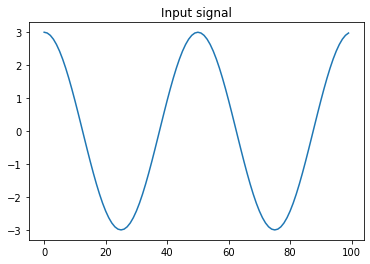

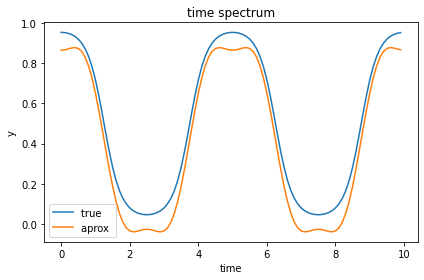

In [12]:
A = 3
phi_0 = (2*np.pi)/5

c = 1

if c == 0:
    alpha_0 = 1/2
    alpha_1 = A/4 - (A**3)/64
    alpha_2 = 0
    alpha_3 = -(A**3)/192
    
else:
    f_0 = 2/3
    f_1 = 2/9
    f_2 = -2/27
    f_3 = -2/27
    alpha_0 = f_0 - f_1 * c + 1/4 * f_2 * A**2 + 1/2 * f_2 * c**2 - 1/4 * f_3 * A**2 * c - 1/6 * f_3 * c**3
    alpha_1 = f_1 * A - f_2 * A * c + 1/8 * f_3 * A**3 + 1/2 * f_3 * A * c**2
    alpha_2 = 1/4 * f_2 * A**2 - 1/4 * f_3 * A**2 * c
    alpha_3 = 1/24 * f_3 * A**3
    
    

#alpha values if c = 0 

#alpha_0 = 1/2
#alpha_1 = A/4 - (A**3)/64
#alpha_2 = 0
#alpha_3 = -(A**3)/192

# alpha values if c = np.log(2)
#alpha_0 = f_0 - f_1 * c + 1/4 * f_2 * A**2 + 1/2 * f_2 * c**2 - 1/4 * f_3 * A**2 * c - 1/6 * f_3 * c**3
#alpha_1 = f_1 * A - f_2 * A * c + 1/8 * f_3 * A**3 + 1/2 * f_3 * A * c**2
#alpha_2 = 1/4 * f_2 * A**2 - 1/4 * f_3 * A**2 * c
#alpha_3 = 1/24 * f_3 * A**3

#approximate system
def y_hat(x, alpha_0, alpha_1, alpha_2, alpha_3):
    
    y_hat = alpha_0 + alpha_1 * np.cos(phi_0*x) + alpha_2 * np.cos(2*phi_0*x) + alpha_3 * np.cos(3*phi_0*x)
    return y_hat

#true system
def y(x):
    y_n = 1/(1 + np.exp(-x))
    
    return y_n

y_list = []
x_list = []
input_list = []
y_hat_list = []

for i in range(0,100):
    x = A*np.cos(phi_0*i/10)
    input_list.append(x)
    y_list.append(y(x))
    x_list.append(i/10)
    
    y_hat_list.append(y_hat(i/10,alpha_0, alpha_1, alpha_2, alpha_3))


plt.close('all')

plt.figure()
plt.plot(input_list)
plt.title('Input signal')
#plt.savefig('data/figures/task2_input.jpg')

plt.figure()
plt.plot(x_list, y_list, label='true ')
plt.plot(x_list, y_hat_list, label='aprox ')
plt.legend()
plt.xlabel('time')
plt.ylabel('y')
plt.title('time spectrum')
plt.tight_layout()
#plt.savefig('data/figures/curves_{}_{}.jpg'.format(A,c))


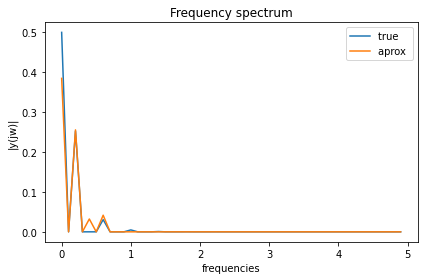

In [119]:
#plot the frequeny domain

time        = np.arange(-10, 1, 1)
#amplitude1 = np.sin(2*np.pi*4*time)


#plt.plot(amplitude1)

fourierTransform_1 = np.fft.fft(y_list)/len(y_list)
fourierTransform_1 = fourierTransform_1[range(int(len(y_list)/2))]
fourierTransform_2 = np.fft.fft(y_hat_list)/len(y_hat_list)
fourierTransform_2 = fourierTransform_2[range(int(len(y_hat_list)/2))]
tp     = len(y_list)
values      = np.arange(int(tp/2))
timePeriod  = tp/10
frequencies = values/timePeriod

plt.plot(frequencies, abs(fourierTransform_1),label='true ')
plt.plot(frequencies, abs(fourierTransform_2),label='aprox ')
plt.xlabel('frequencies')
plt.ylabel('|y(jw)|')
plt.title('Frequency spectrum')
plt.legend()
plt.tight_layout()

#plt.savefig('data/figures/curves_fft_{}_{}.jpg'.format(A,c))